## Reading many similar files from a folder and combining the results



In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt

First we try to read one file to make sure we're using the correct parameters:

In [3]:
test = pd.read_csv('filenames/Labram_laser514nm_1mW_30sx4_800nmgrating_T-200K_sample-B.txt', delim_whitespace=True, names=['wavenumber','intensity'])
test

,wavenumber,intensity
0,500,0.074992
1,501,0.028344
2,502,0.051664
3,503,0.060592
4,504,0.046647
...,...,...
196,696,0.069203
197,697,0.071076
198,698,0.066464
199,699,0.092171


This seems reasonable, but now we'd like to extract parameters from the filename.

In [7]:
import re
def read_file(f) :
    d = pd.read_csv(f, delim_whitespace=True, names=['wavenumber','intensity'])
    info = f.split('_')
    d['sample'] = re.sub('sample-|.txt','', info[6])
    d['temperature'] = float(re.sub('T-|K','', info[5]))
    
    return(d)

read_file('filenames/Labram_laser514nm_1mW_30sx4_800nmgrating_T-200K_sample-B.txt')

,wavenumber,intensity,sample,temperature
0,500,0.074992,B,200.0
1,501,0.028344,B,200.0
2,502,0.051664,B,200.0
3,503,0.060592,B,200.0
4,504,0.046647,B,200.0
...,...,...,...,...
196,696,0.069203,B,200.0
197,697,0.071076,B,200.0
198,698,0.066464,B,200.0
199,699,0.092171,B,200.0


We can now grab all the filenames, and read them in:

In [ ]:
import glob
import os

path = r'filenames' 
txt_files = glob.glob(os.path.join(path , "*.txt"))
n = len(txt_files)
txt_files

In [8]:
d = pd.concat((read_file(f) for f in txt_files))
d

,wavenumber,intensity,sample,temperature
0,500,0.074992,B,200.0
1,501,0.028344,B,200.0
2,502,0.051664,B,200.0
3,503,0.060592,B,200.0
4,504,0.046647,B,200.0
...,...,...,...,...
196,696,0.094646,A,150.0
197,697,0.087045,A,150.0
198,698,0.042058,A,150.0
199,699,0.038669,A,150.0


We now have access to the whole set of variables corresponding to each data point:

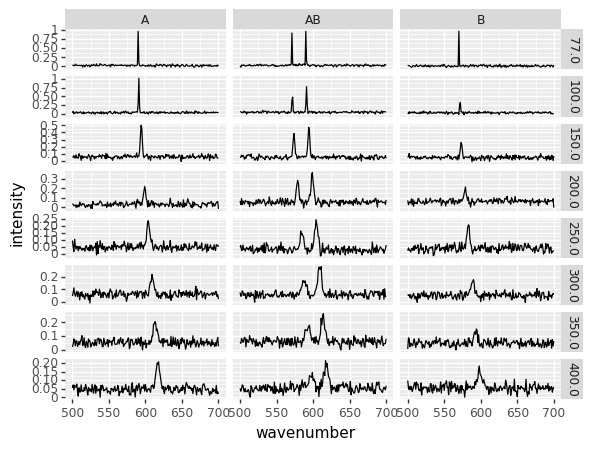

<ggplot: (8789659312442)>

In [12]:
from plotnine import *
(ggplot(d) +
  geom_line(aes(x = 'wavenumber',
                  y = 'intensity')) +
  facet_grid('temperature ~ sample', scales='free'))

If needed, we can also reshape the dataset to 'wide' format,  

In [14]:
w = d.pivot(index='wavenumber', columns=['temperature','sample'], values='intensity')
w

temperature     200.0     350.0     300.0     77.0      200.0     350.0  \
sample              B         B        AB        AB         A         A   
wavenumber                                                                
500          0.074992  0.004323  0.076536  0.013187  0.040021  0.019496   
501          0.028344  0.085461  0.046044 -0.018791  0.032908  0.038194   
502          0.051664  0.077181  0.047811  0.040806  0.018934  0.077511   
503          0.060592  0.020926  0.088789  0.025998  0.020978  0.072047   
504          0.046647  0.046893  0.078558  0.028949  0.026733  0.027818   
...               ...       ...       ...       ...       ...       ...   
696          0.069203  0.068946  0.100046  0.026807  0.038232  0.051920   
697          0.071076  0.009869  0.022073  0.003969  0.047044  0.027709   
698          0.066464  0.073517  0.105147  0.053418  0.060559  0.066897   
699          0.092171  0.026258  0.043518  0.047509  0.061322  0.088515   
700         -0.001873  0.063085  0.040245  0.034734 -0.015264  0.023307   

temperature     300.0     250.0     150.0     300.0  ...     200.0     400.0  \
sample              B         B        AB         A  ...        AB         B   
wavenumber                                           ...                       
500          0.061139  0.024770  0.044493  0.047502  ...  0.065927  0.097784   
501          0.051306  0.044119  0.052452  0.075359  ...  0.030383  0.053423   
502          0.058560  0.027171  0.080658  0.112588  ...  0.093500  0.044374   
503          0.035060  0.028181  0.059616  0.067806  ...  0.029277  0.064850   
504          0.058260  0.015008  0.079030  0.045999  ...  0.068539  0.045043   
...               ...       ...       ...       ...  ...       ...       ...   
696          0.056711  0.050955  0.038063  0.083492  ...  0.053672  0.056958   
697          0.031566  0.007096  0.033194  0.081829  ...  0.054311  0.061701   
698          0.055108  0.017699  0.051050  0.044317  ...  0.056145  0.029431   
699          0.068128  0.023275  0.073509  0.058521  ...  0.033373  0.050172   
700          0.061532  0.020031  0.036904  0.023002  ...  0.080003  0.060158   

temperature     250.0     100.0                         350.0     400.0  \
sample             AB         B         A        AB        AB        AB   
wavenumber                                                                
500          0.048911  0.030249  0.034631  0.053777  0.053818  0.050812   
501          0.060435  0.005080  0.072406  0.064198  0.046188  0.034646   
502          0.024800  0.065015  0.002483  0.038562  0.081160  0.051756   
503          0.029291  0.015257  0.029402  0.044708  0.071798  0.071617   
504          0.064404  0.045351  0.029537  0.031399  0.052140  0.068621   
...               ...       ...       ...       ...       ...       ...   
696          0.034406  0.002294  0.045724  0.064356  0.028167  0.048360   
697          0.006184  0.023873  0.047459  0.067253  0.042348  0.056965   
698          0.024783 -0.003111  0.040905  0.058880  0.042994  0.052892   
699          0.035225  0.004628  0.034977  0.058225  0.045544  0.042894   
700          0.064786  0.007770  0.039950  0.063928  0.078361  0.066788   

temperature     150.0            
sample              B         A  
wavenumber                       
500          0.045007  0.053432  
501          0.062872  0.052081  
502          0.104609  0.075111  
503          0.036044  0.042554  
504          0.057326  0.041804  
...               ...       ...  
696          0.018886  0.094646  
697          0.078957  0.087045  
698          0.070674  0.042058  
699          0.003739  0.038669  
700          0.067909  0.040565  

[201 rows x 24 columns]

Incidentally, the reverse operation can be done with `melt`, and would look like:

In [34]:
var_list=list(w.columns)
l = pd.melt(w, value_vars=var_list,value_name='I', ignore_index=False)
l = l.reset_index(level=['wavenumber']) # trick to convert the confusing (to me) multiindex into a standard column
l

,wavenumber,temperature,sample,I
0,500,200.0,B,0.074992
1,501,200.0,B,0.028344
2,502,200.0,B,0.051664
3,503,200.0,B,0.060592
4,504,200.0,B,0.046647
...,...,...,...,...
4819,696,150.0,A,0.094646
4820,697,150.0,A,0.087045
4821,698,150.0,A,0.042058
4822,699,150.0,A,0.038669


_Download this page [as a Jupyter notebook](https://github.com/vuw-scps/python-physics/raw/master/notebooks/phys345/wrangling_02_folder_filenames.ipynb) or as a [standalone Python script](https://github.com/vuw-scps/python-physics/raw/master/scripts/phys345/wrangling_02_folder_filenames.py)._